In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n=25
beta={0:1/np.linspace(1,4,n),1:1/np.linspace(2.2,2.4,n)}
J=1
h=0

# Transfer Matrix (L=1)
$$\mathcal T=
\begin{bmatrix}
e^{\beta (J+h)} & e^{-\beta J}\\
e^{-\beta J} & e^{\beta (J-h)}
\end{bmatrix}$$

In [3]:
def get_T(beta):
    return np.exp(np.array([[beta*(J+h),-beta*J],
                            [-beta*J,beta*(J-h)]]))
T={}
for i in range(2):
    T[i]=get_T(beta[i])
    T[i]=T[i].transpose(2,0,1)

In [4]:
v={}
for i in range(2):
    v[i]=np.linalg.eigvalsh(T[i])

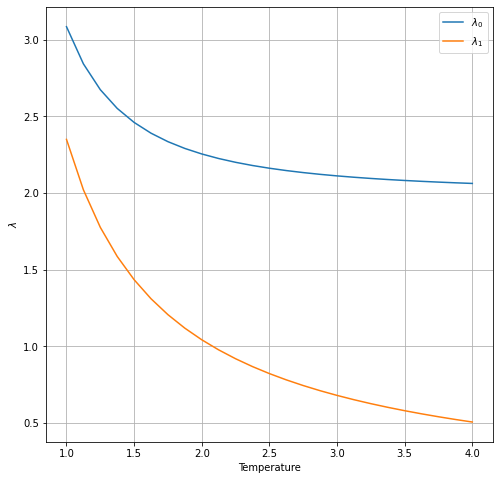

In [27]:
plt.figure(figsize=(8,8))
plt.plot(1/beta[0],(v[0])[:,-1],label='$\lambda_0$')
plt.plot(1/beta[0],(v[0])[:,-2],label='$\lambda_1$')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('$\lambda$')
plt.grid()
plt.show()

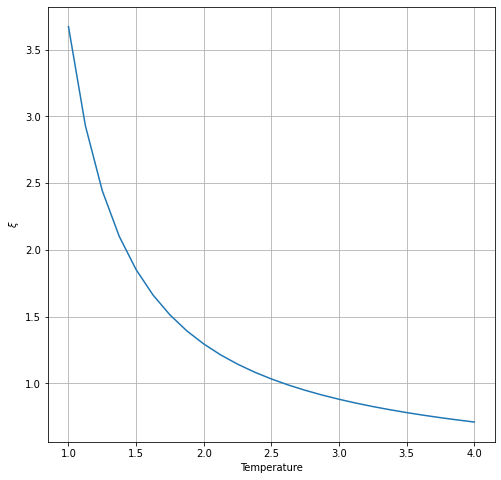

In [28]:
cor_len={}
for i in range(2):
    cor_len[i]=1/np.log((v[i])[:,-1]/(v[i])[:,-2])

plt.figure(figsize=(8,8))
plt.plot(1/beta[0],cor_len[0])
plt.xlabel('Temperature')
plt.grid()
plt.ylabel('$\\xi$')
plt.show()

# 2D Transfer matrix (L=2)
$$\mathcal T=\begin{bmatrix}
e^{\beta(4J+2h)}& e^{\beta h}& e^{\beta h}& 1\\
e^{\beta h}& 1 & e^{-\beta J}& e^{-\beta h}\\
e^{\beta h}& e^{-4\beta J}& 1 & e^{-\beta h}\\
1& e^{-\beta h}& e^{-\beta h}& e^{\beta(4J-2h)}\\
\end{bmatrix}$$

In [10]:
def get_T_2(beta):
    return np.exp(np.array([[beta*(4*J+2*h),beta*h,beta*h,np.zeros(n)],
                   [beta*h,np.zeros(n),-beta*J,-beta*h],
                   [beta*h,-4*beta*J,np.zeros(n),-beta*h],
                   [np.zeros(n),-beta*h,-beta*h,beta*(4*J-2*h)]]))
T_2={}
for i in range(2):
    T_2[i]=get_T_2(beta[i])
    T_2[i]=T_2[i].transpose(2,0,1)

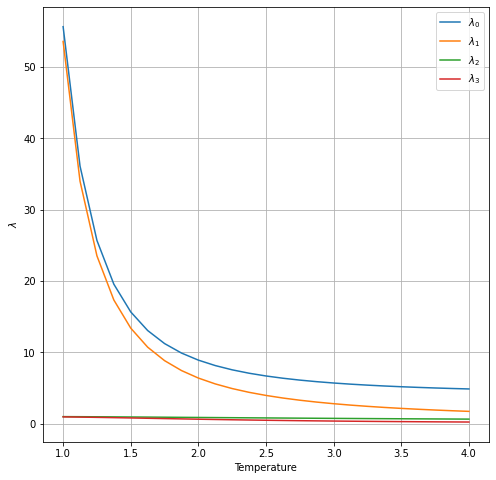

In [31]:
v_2={}
plt.figure(figsize=(8,8))
for i in range(2):
    v_2[i]=np.linalg.eigvalsh(T_2[i])
for i in range(4):
    plt.plot(1/beta[0],(v_2[0])[:,-(i+1)],label='$\lambda_%d$' %i)

plt.legend(loc=1)
plt.xlabel('Temperature')
plt.grid()
plt.ylabel('$\lambda$')
plt.show()

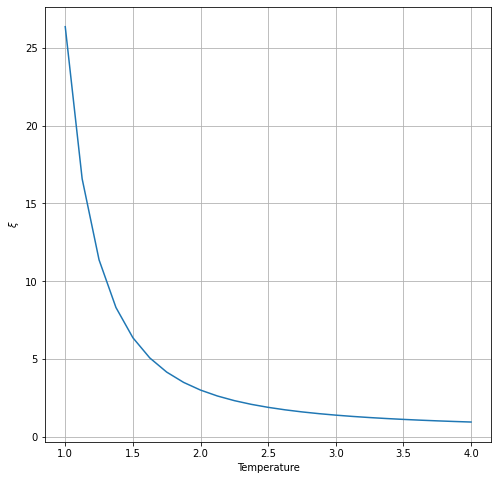

In [32]:
cor_len_2={}
plt.figure(figsize=(8,8))
for i in range(2):
    cor_len_2[i]=1/np.log((v_2[i])[:,-1]/(v_2[i])[:,-2])
plt.plot(1/beta[0],cor_len_2[0])
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('$\\xi$')
plt.show()

# 2D Transfer matrix (L=3)
$$\mathcal T=\begin{bmatrix}
e^{\beta (3h + 6J)} &e^{2\beta h + 2 J} &e^{\beta (2h + 2J)} &e^{\beta h} &e^{\beta (2h + 2J)} &e^{\beta h} &e^{\beta h} &1\\
e^{\beta (2h + 2J)} &e^{\beta (h + 2J)} &e^{\beta (h - 2J)} &1 &e^{\beta (h - 2J)} &1 &e^{-4\beta J} &e^{-\beta h}\\
e^{\beta (2h + 2J)}& e^{\beta (h - 2J)}& e^{\beta (h + 2J)}& 1& e^{\beta (h - 2J)}& e^{-4\beta J}& 1& e^{-\beta h}\\
e^{\beta h}& 1& 1& e^{\beta (-h + 2J)}& e^{-4\beta J}& e^{\beta (-h - 2J)}& e^{\beta (-h - 2J)}& e^{\beta (-2h + 2J)}\\
e^{\beta (2h + 2J)}& e^{\beta (h - 2J)}& e^{\beta (h - 2J)}& e^{-4\beta J}& e^{\beta (h + 2J)}& 1& 1& e^{-\beta h}\\
e^{\beta h}& 1& e^{-4\beta J}& e^{\beta (-h - 2J)}& 1& e^{\beta (-h + 2J)}& e^{\beta (-h - 2J)}& e^{\beta (-2h + 2J)}\\
e^{\beta h}& e^{-4\beta J}& 1& e^{\beta (-h - 2J)}& 1& e^{\beta (-h - 2J)}& e^{\beta (-h + 2J)}& e^{\beta (-2h + 2J)}\\
1& e^{-\beta h}& e^{-\beta h}& e^{\beta (-2h + 2J)}& e^{-\beta h}& e^{\beta (-2h + 2J)}& e^{\beta (-2h + 2J)}& e^{\beta (-3h + 6J)}\\
\end{bmatrix}$$

In [13]:
def get_T_3(beta):
    return np.exp(beta.reshape(-1,1,1) *  np.array(
                    [[3*h + 6*J, 2*h + 2*J, 2*h + 2*J, h, 2*h + 2*J, h, h, 0],
                    [2*h + 2*J, h + 2*J, h - 2*J, 0, h - 2*J, 0, -4*J, -h],
                    [2*h + 2*J, h - 2*J, h + 2*J, 0, h - 2*J, -4*J, 0, -h],
                    [h, 0, 0, -h + 2*J, -4*J, -h - 2*J, -h - 2*J, -2*h + 2*J],
                    [2*h + 2*J, h - 2*J, h - 2*J, -4*J, h + 2*J, 0, 0, -h],
                    [h, 0, -4*J, -h - 2*J, 0, -h + 2*J, -h - 2*J, -2*h + 2*J],
                    [h, -4*J, 0, -h - 2*J, 0, -h - 2*J, -h + 2*J, -2*h + 2*J],
                    [0, -h, -h, -2*h + 2*J, -h, -2*h + 2*J, -2*h + 2*J, -3*h + 6*J]]))
T_3={}
for i in range(2):
    T_3[i]=get_T_3(beta[i])

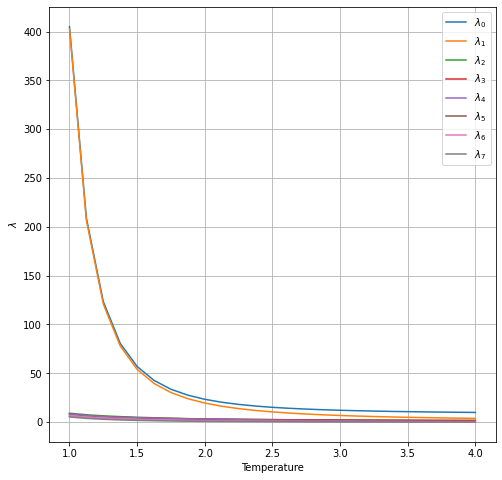

In [33]:
v_3={}
plt.figure(figsize=(8,8))
for i in range(2):
    v_3[i]=np.linalg.eigvalsh(T_3[i])
for i in range(8):
    plt.plot(1/beta[0],(v_3[0])[:,-(i+1)],label='$\lambda_%d$' %i)
plt.legend(loc=1)
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('$\lambda$')
plt.show()

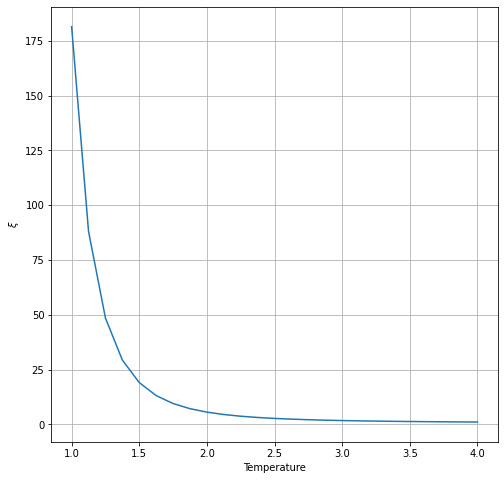

In [34]:
cor_len_3={}
plt.figure(figsize=(8,8))
for i in range(2):
    cor_len_3[i]=1/np.log((v_3[i])[:,-1]/(v_3[i])[:,-2])
plt.plot(1/beta[0],cor_len_3[0])
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('$\\xi$')
plt.show()

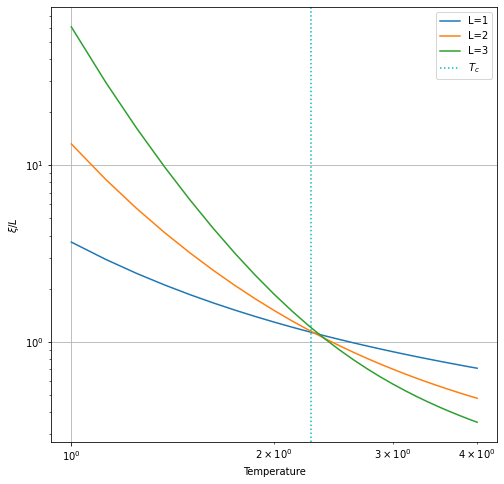

In [35]:
Tc=2/np.log(1+np.sqrt(2))
plt.figure(figsize=(8,8))
plt.plot(1/beta[0],cor_len[0]/1,label='L=1')
plt.plot(1/beta[0],cor_len_2[0]/2,label='L=2')
plt.plot(1/beta[0],cor_len_3[0]/3,label='L=3')
plt.axvline(x=Tc,c='c',ls=':',label='$T_c$')
plt.legend()
plt.loglog()
plt.xlabel('Temperature')
plt.ylabel('$\\xi/L$')
plt.grid()
plt.show()

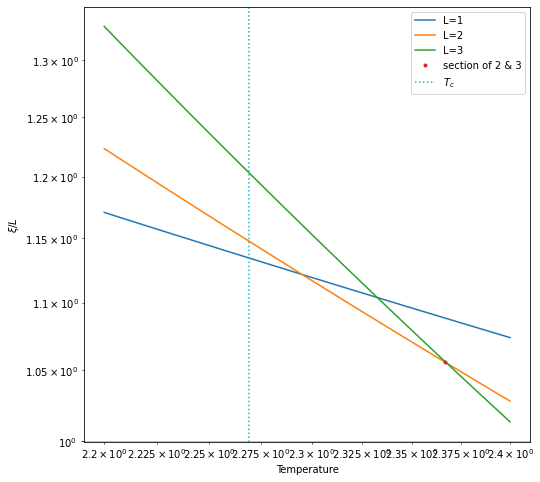

In [37]:
cross23=np.argmin(np.abs(cor_len_2[1]/2-cor_len_3[1]/3))
Tc=2/np.log(1+np.sqrt(2))
plt.figure(figsize=(8,8))
plt.plot(1/beta[1],cor_len[1]/1,label='L=1')
plt.plot(1/beta[1],cor_len_2[1]/2,label='L=2')
plt.plot(1/beta[1],cor_len_3[1]/3,label='L=3')
plt.plot(1/beta[1][cross23],cor_len_2[1][cross23]/2,'.',label='section of 2 & 3')
plt.axvline(x=Tc,c='c',ls=':',label='$T_c$')
plt.legend(loc=1)
plt.loglog()
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('$\\xi/L$')
plt.show()

# Tensor Approach


In [39]:
import sympy as sp
b=sp.Symbol("beta")
B=sp.Symbol('B')

$$M=\begin{bmatrix}
\sqrt{\cosh\beta} & \sqrt{\sinh\beta}\\
\sqrt{\cosh\beta} & -\sqrt{\sinh\beta}
\end{bmatrix}$$

In [40]:
M=sp.Array([[sp.sqrt(sp.cosh(b)),sp.sqrt(sp.sinh(b))],
            [sp.sqrt(sp.cosh(b)),-sp.sqrt(sp.sinh(b))]])
S=sp.Array([sp.exp(b*B),sp.exp(-b*B)])

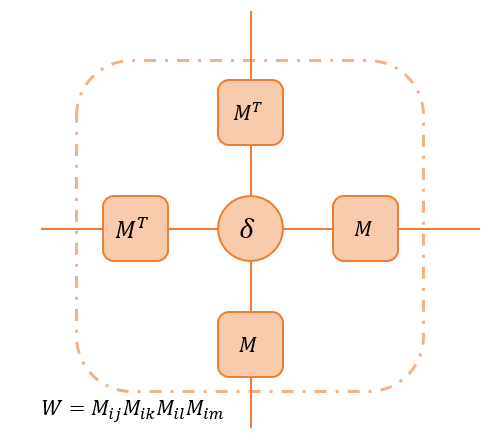

In [41]:
W=sp.tensorcontraction(sp.tensorproduct(M,M,M,M,S),(0,2,4,6,8))

$$
T_{\text{(L=1)}}=M_{ij}M_{ik}\\
T_{\text{(L=2)}}=W_{ijkl}W_{mlnj}\\
T_{\text{(L=3)}}=W_{ijkl}W_{mlno}W_{poqj}
$$

In [42]:
T_tensor_sym={}

# Create T(L=1) with sympy
T_tensor_sym[1]=sp.tensorcontraction(sp.tensorproduct(M,M,S),(0,2,4))

# Create T(L=2)
T_tensor_sym[2]=sp.tensorcontraction(sp.tensorcontraction(sp.tensorproduct(W,W),(1,7)), (2,4))
T_tensor_sym[2]=sp.permutedims(T_tensor_sym[2],(0,2,1,3))
T_tensor_sym[2]=T_tensor_sym[2].reshape(4,4)
# Create T(L=3)
T_tensor_sym[3]=sp.tensorcontraction(
    sp.tensorcontraction(
    sp.tensorcontraction(
    sp.tensorproduct(W,W,W),(1,11)),(2,4)),(4,6))
T_tensor_sym[3]=sp.permutedims(T_tensor_sym[3],(0,2,4,1,3,5))
T_tensor_sym[3]=T_tensor_sym[3].reshape(8,8)
# Create T(L=3)
T_tensor_sym[4]=sp.tensorcontraction(
    sp.tensorcontraction(
    sp.tensorcontraction(
    sp.tensorcontraction(
    sp.tensorproduct(W,W,W,W),(1,11)),(2,4)),(4,6)))

# Add extra term in case 0 cannot be change to numpy array
for i in range(1,4):
    T_tensor_sym[i]=T_tensor_sym[i]+b*sp.Array(sp.ones(2**i,2**i))

In [43]:
T_lam={}

# Change sympy array to function
for i in range(1,4):
    T_lam[i]=sp.lambdify((b,B),T_tensor_sym[i],'numpy')

T_lam_1=sp.lambdify(b,T_tensor_sym[1],'numpy')

In [44]:
# Create T with different temperature
T_tensor={1:T_lam[1](beta[0],h),2:T_lam[2](beta[0],h),3:T_lam[3](beta[0],h)}


for i in range(1,4):
    T_tensor[i]=T_tensor[i]-np.ones((2**i,2**i,n))*beta[0] #minus the extra term added before
    T_tensor[i]=T_tensor[i].transpose(2,0,1)

v_tensor={}

# Calculate eigenvalues
for i in range(1,4):
    v_tensor[i]=np.linalg.eigvalsh(T_tensor[i])

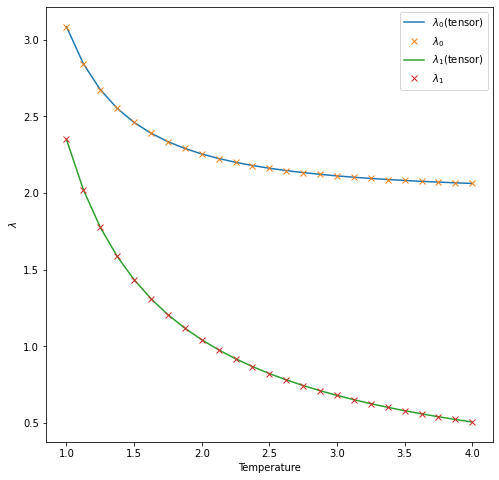

In [45]:
#print()
plt.figure(figsize=(8,8))
for i in range(len(v_tensor[1][0,:])):
    plt.plot(1/beta[0],v_tensor[1][:,-(i+1)],label='$\lambda_%d$(tensor)' %i)
    plt.plot(1/beta[0],(v[0])[:,-(i+1)],'x',label='$\lambda_%d$' %i)
    
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('$\lambda$')
plt.show()


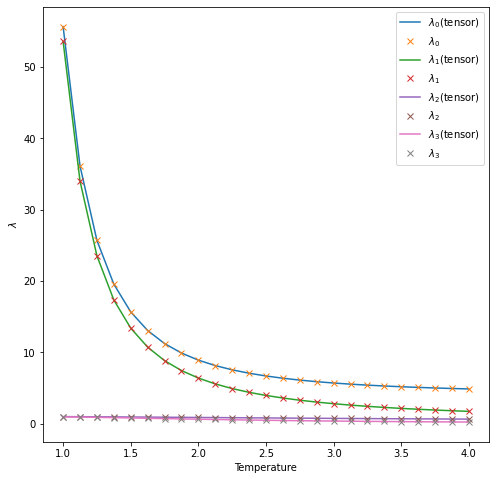

In [49]:
plt.figure(figsize=(8,8))
for i in range(len(v_tensor[2][0,:])):
    plt.plot(1/beta[0],v_tensor[2][:,-(i+1)],label='$\lambda_%d$(tensor)' %i)
    plt.plot(1/beta[0],(v_2[0])[:,-(i+1)],'x',label='$\lambda_%d$' %i)
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('$\lambda$')
plt.show()


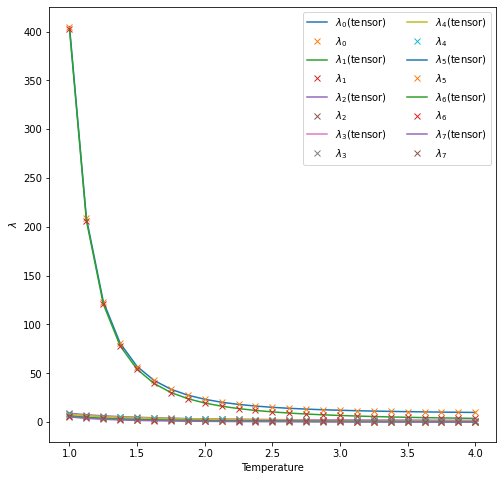

In [51]:
plt.figure(figsize=(8,8))
for i in range(len(v_tensor[3][0,:])):
    plt.plot(1/beta[0],v_tensor[3][:,-(i+1)],label='$\lambda_%d$(tensor)' %i)
    plt.plot(1/beta[0],(v_3[0])[:,-(i+1)],'x',label='$\lambda_%d$' %i)
plt.legend(ncol=2)
plt.xlabel('Temperature')
plt.ylabel('$\lambda$')
plt.show()


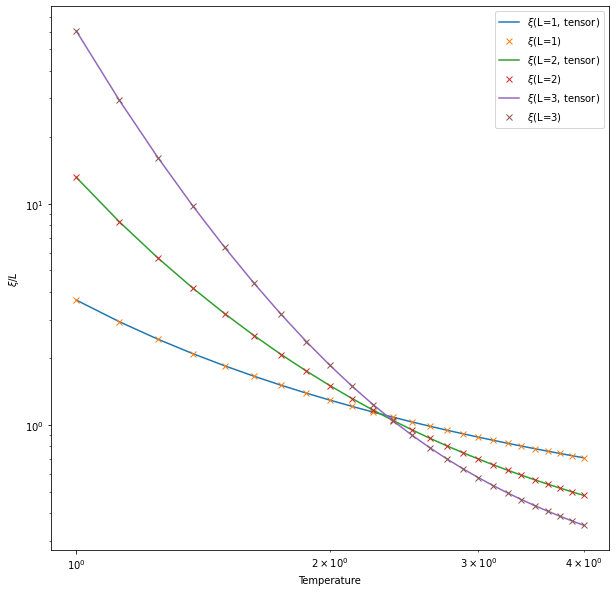

In [53]:
corr_len_tensor={}
corr_len={1:cor_len[0], 2:cor_len_2[0], 3:cor_len_3[0]}

plt.figure(figsize=(8,8))
for i in range(1,4):
    corr_len_tensor[i]=1/np.log(v_tensor[i][:,-1]/v_tensor[i][:,-2])
    plt.plot(1/beta[0], corr_len_tensor[i]/i,label='$\\xi$(L=%d, tensor)' %i)
    plt.plot(1/beta[0], corr_len[i]/i,'x',label='$\\xi$(L=%d)' %i)
plt.legend()
plt.loglog()
plt.xlabel('Temperature')
plt.ylabel('$\\xi/L$')
plt.show()